In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import random

In [80]:
Movies = pd.read_csv('Wins.txt')
# glimspe at the first 5 rows 
Movies.head()

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,Zack and Miri Make a Porno,Romance,The Weinstein Company,70,1.747542,64,$41.94,2008
1,Youth in Revolt,Comedy,The Weinstein Company,52,1.090000,68,$19.62,2010
2,You Will Meet a Tall Dark Stranger,Comedy,Independent,35,1.211818,43,$26.66,2010
3,When in Rome,Comedy,Disney,44,0.000000,15,$43.04,2010
4,What Happens in Vegas,Comedy,Fox,72,6.267647,28,$219.37,2008


In [136]:
print(Movies.shape) # Its has 77 rows and 8 columns 
print(Movies.isna().sum()) # None exist 
print(Movies.isnull().sum()) # None exist 
print(Movies.duplicated().sum()) # There appear to be 2 rows that hold duplicated varaibles 


(77, 8)
Film            0
Genre           0
Studio_Brand    0
Crowd_Score     0
Profit          0
Dislikes        0
Global_Gains    0
Year            0
dtype: int64
Film            0
Genre           0
Studio_Brand    0
Crowd_Score     0
Profit          0
Dislikes        0
Global_Gains    0
Year            0
dtype: int64
2


In [82]:
# Changing Name  
Movies.rename({'Audience score %' : 'Crowd_Score'}, axis = 1, inplace = True)
Movies.rename({'Rotten Tomatoes %' :  'Dislikes'}, axis = 1, inplace = True)
Movies.rename({'Worldwide Gross' :  'Global_Gains'}, axis = 1, inplace = True)
Movies.rename({'Lead Studio' : 'Studio_Brand'}, axis = 1, inplace = True)
Movies.rename({'Profitability' : 'Profit'}, axis = 1, inplace = True)

In [83]:
# Verify the dataframe's columns original names were rename
print(Movies.columns)
# Evaluating each variabe and determining if it's current form is suitable for an effective data analysis 
print(Movies.dtypes)
# Some varables such as Global Gains illustrate as numeric  with an object and string type of classification

Index(['Film', 'Genre', 'Studio_Brand', 'Crowd_Score', 'Profit', 'Dislikes',
       'Global_Gains', 'Year'],
      dtype='object')
Film             object
Genre            object
Studio_Brand     object
Crowd_Score       int64
Profit          float64
Dislikes          int64
Global_Gains     object
Year              int64
dtype: object


In [88]:
# Global_Gains variable has must be coverted into an integer or a float due to it being quantitative at face value 
# It will be a huge influencial factor along with profit in determining which brand and genre sells and earns the most 
Matcher = lambda x : x.replace('$', '') # Strip the $ sign 
print(Movies.Global_Gains.dtypes) # It remain an object 
Movies['Global_Gains'] = Movies['Global_Gains'].astype('str') # ensure it is a string
Movies['Global_Gains'] = Movies['Global_Gains'].apply(Matcher) # apply the matcher lamba function 
print(Movies.Global_Gains.head()) # first five rows


object
0     41.94 
1     19.62 
2     26.66 
3     43.04 
4    219.37 
Name: Global_Gains, dtype: object


In [89]:
# convert the column into a float due to it's decimal . placed in the middle and for the purpose of calculating it 
Movies['Global_Gains'] = Movies['Global_Gains'].astype(float)  
 # ensure the previous astype conversion was sucessful
print(Movies.Global_Gains.dtype) 

float64


In [90]:
print(Movies.describe().loc['75%', 'Profit'])
Goose = Movies.describe().loc['75%', 'Profit']
Mapper = Movies[Movies['Profit'] > Goose]
print(Mapper.count()) #  Quantity of Films that hold a Profit above the highest precentile Q3 
print(Mapper.groupby(['Genre'])['Film'])

5.1031168330000005
Film            19
Genre           19
Studio_Brand    19
Crowd_Score     19
Profit          19
Dislikes        19
Global_Gains    19
Year            19
dtype: int64


list of columns with a total of  8  unique 

Index(['Film', 'Genre', 'Studio_Brand', 'Crowd_Score', 'Profit', 'Dislikes',
       'Global_Gains', 'Year'],
      dtype='object') 

total films for each genre 

Comedy : 41
Drama : 13
Romance : 13
Animation : 4
Romence : 1
romance : 1
Fantasy : 1
comedy : 1
Comdy : 1
Action : 1


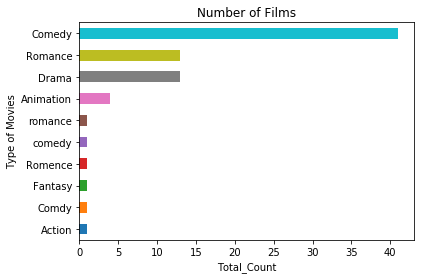

In [145]:
print("list of columns with a total of " , Movies.columns.nunique() ," unique \n")
print(Movies.columns, "\n")

Total = Movies.Genre.value_counts().sort_values(ascending = False)
print("total films for each genre \n")
for i, g in Total.iteritems():
    print(i,":",g)
Ghost = Movies.groupby(['Genre'])['Film'].count().sort_values(ascending = True)
fig, ax = plt.subplots() 
Ghost.plot(kind = 'barh')
ax.set(ylabel = 'Type of Movies', xlabel = 'Total_Count', title = 'Number of Films')

plt.show()
# genres ( Comdedy, Drama , Romanc and Animation ) each holds atleast more than one film 
# other genres of that only contain one film may not provide an accurate inight due to it's aggerate values being all of same 
# films such as (Action and Fatasy can be incoporate within a ( Studio Brand's ) overall agg)

In [92]:
Ghost = Movies.groupby(['Genre'])['Film'].count().sort_values(ascending = False)

In [176]:
# dimensions provides the scope that will used to evaluate on which cleaning methods will be used 
print(" The dimensions of the movies dataframe : ", Movies.shape) 
print(" It contains " , Movies.index.nunique(), " rows  and ", Movies.columns.nunique(), "columns")
Categorical = Movies[['Film', 'Genre' ,'Studio_Brand', 'Year']]
# the amount of unique films is not equal to dimesions of the dataframe 
# therefore there mite be some duplicates and I must take the proper steps of droping them prior to preceding 
print(Categorical.nunique())
# confirm the  dimesions
print(Categorical.count())

 The dimensions of the movies dataframe :  (77, 8)
 It contains  77  rows  and  8 columns
Film            75
Genre           10
Studio_Brand    13
Year             5
dtype: int64
Film            77
Genre           77
Studio_Brand    77
Year            77
dtype: int64


In [13]:
# due to the fact that all Film names aren't unique  I must find which rows holds duplicate valuds 
# Using a for loop to iterrate through the Series columns to rapidly find those duplicate variables
for Zips, Rips in Movies.loc[(Movies['Film'].duplicated())].iterrows():
    print(Zips, Rips)
# Two Films appear 

46 Film            Mamma Mia!
Genre               Comedy
Studio_Brand     Universal
Crowd_Score             76
Profit             9.23445
Dislikes                53
Global_Gains        609.47
Year                  2008
Name: 46, dtype: object
65 Film            Gnomeo and Juliet
Genre                   Animation
Studio_Brand               Disney
Crowd_Score                    52
Profit                    5.38797
Dislikes                       56
Global_Gains               193.97
Year                         2011
Name: 65, dtype: object


In [16]:
for giants in Movies.groupby('Year')['Global_Gains'].mean().iteritems():
    print(giants)

(2007, 119.52363636363636)
(2008, 207.43099999999998)
(2009, 167.2825)
(2010, 99.814)
(2011, 122.47857142857144)


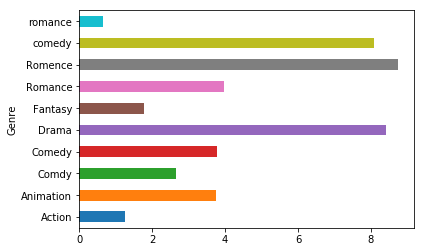

In [18]:
Movies.groupby('Genre')['Profit'].mean().plot(kind = 'barh')

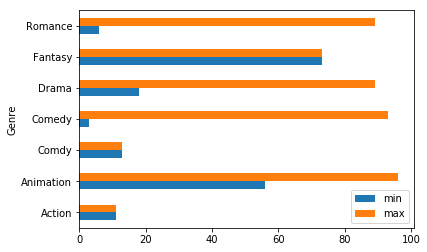

In [25]:
Movies.groupby('Genre')['Dislikes'].agg({'min', 'max'}).drop(['Romence','comedy', 'romance']).plot(kind = 'barh')

Studio_Brand
CBS                        77.09
Disney                    950.27
Fox                       661.85
Independent               399.07
Lionsgate                  59.19
New Line                   20.71
Paramount                 176.58
Sony                       33.53
Summit                     99.92
The Weinstein Company      19.62
Universal                1695.13
Warner Bros.             1888.77
Name: Global_Gains, dtype: float64
Legend


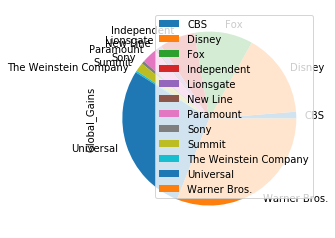

In [66]:
Brands = Movies.groupby(['Genre']).get_group('Comedy').groupby('Studio_Brand')
print(Brands['Global_Gains'].sum())
fig. ax = plt.subplots()
print(Brands['Global_Gains'].sum().plot.pie().legend())
ax.legend(loc = 'best')
plt.show() 

In [74]:
Mean_Score = Movies.Crowd_Score.mean()
print(Mean_Score)
Upper  = Movies.describe().loc['75%', 'Crowd_Score']
print(Upper)

63.72727272727273
76.0


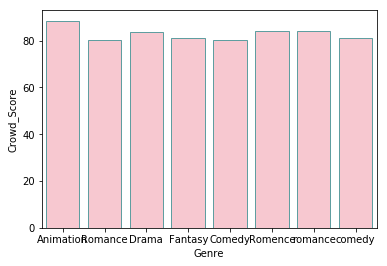

In [79]:
sns.barplot(x = 'Genre', y = 'Crowd_Score', estimator = np.mean,
            ci = False, data = Movies.query('Crowd_Score > 76.0') , color = 'pink',
            edgecolor = 'cadetblue')
plt.show()

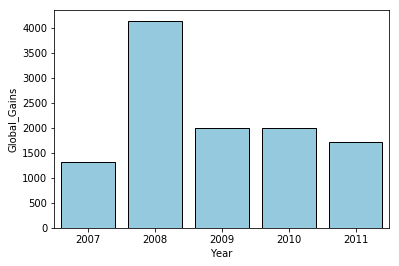

In [83]:
sns.barplot(x = 'Year', y = 'Global_Gains', estimator = np.sum,
             ci = False, data = Movies, color = 'skyblue', edgecolor = 'black')
plt.show()

Genre
Animation     1
Comdy         1
Comedy       12
Drama         3
Fantasy       1
Romance       2
Name: Film, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


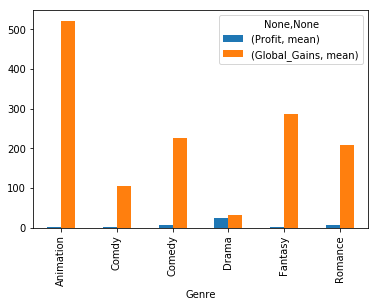

In [110]:
Eights = Movies.query('Year == 2008')
print(Eights.groupby(['Genre']).Film.count())
print(Eights.groupby(['Genre'])[['Profit', 'Global_Gains']].agg(['mean']).plot(kind = 'bar'))


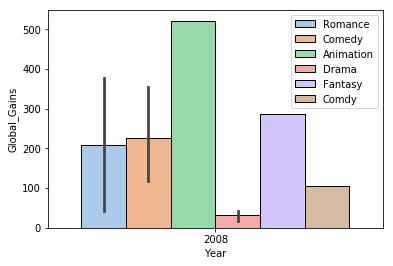

In [108]:
sns.barplot(x = 'Year', y = 'Global_Gains',  data = Eights, palette = 'pastel', edgecolor = 'black', hue = 'Genre')
plt.legend()
plt.show()
# Animation consisted of a single movie 

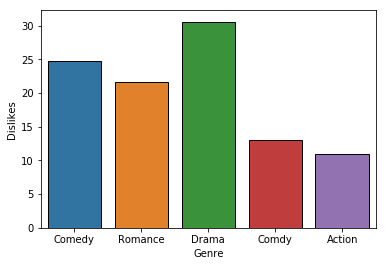

In [118]:
sns.barplot(x = 'Genre', y = 'Dislikes', data = Movies.loc[(Movies['Dislikes'] < 45)],
            estimator = np.mean, ci = False, edgecolor = 'black')
plt.show()
# Use loc to make a more clear and concise illustration
# goal is to find out which more overall had the least amount of dislikes
# tt turns out to be drama 
# with this information I want to find out if a low dislike rating results in higher returns on profits 

In [121]:
Profit_Trips = Movies.describe().loc['75%', 'Profit']
print(Profit_Trips)
Juice = Movies.loc[(Movies['Dislikes'] < 45) ]
print(Juice.Profit.mean())
# both averages are very close and illustrates that movies that endure less criticism hold a higher return on profit 

5.1031168330000005
4.986296059105264


In [137]:
Dislikes_Sings = Movies.describe().loc['25%', 'Dislikes'] # score under the first quartile
print(Dislikes_Sings)
Dis_Songs = Movies.loc[(Movies['Dislikes'] < 26.0) & (Movies['Profit'] > 5.1)] # Dislikes under Q1 and Profits over Q3
print(Dis_Songs.Profit.mean()) # Just above the score 
print(Dis_Songs[['Studio_Brand', 'Genre', 'Profit', 'Dislikes', 'Global_Gains']]) # only two films 
# critisims has no large influence on the amount of earnings are profited 

26.0
5.2528742059999995
   Studio_Brand    Genre    Profit  Dislikes  Global_Gains
13  Independent   Comedy  5.402632        14        205.30
31  Independent  Romance  5.103117        21        153.09


Comedy 5
Drama 2
Romance 2


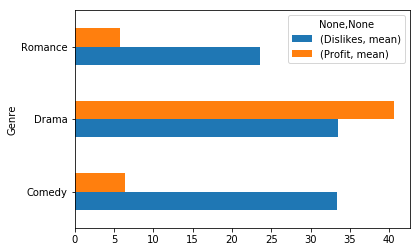

In [161]:
# instead I'll incoporate additional films that lie under the median of Dislikes 
Bits = Movies.loc[(Movies['Dislikes'] < 45) & (Movies['Profit'] > 5.1)]
for Coins, Sparks  in Bits.groupby(['Genre'])['Film'].count().iteritems():
    print(Coins, Sparks) # deliver an accurate count of each specific type of movie
# 
Bits.groupby(['Genre'])[['Dislikes', 'Profit']].agg(['mean']).plot(kind = 'barh')

In [95]:
Loves = Movies.query('Genre == "Romance"')
Lovers = Loves.groupby(['Year'])['Profit'].sum()
Disk = Movies.query('Genre == "Drama"')
Ships = Disk.groupby(['Year'])['Profit'].sum()
Laughs = Movies.query('Genre == "Comedy"')
Apps = Laughs.groupby('Year')['Profit'].sum()
Toons = Movies.query('Genre == "Animation"')
Cars = Toons.groupby(['Year'])['Profit'].sum()

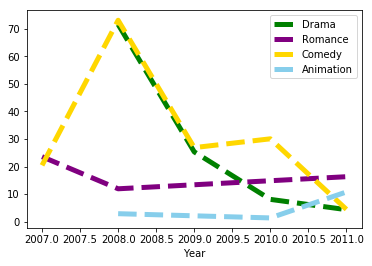

In [97]:
# line plot illustrate a trajectory of the total sum of profits for each year of the listed types of movies
# for the purposes of finding what year each type rised, peaked and began to decline 
fig , ax = plt.subplots()
Ships.plot(kind = 'line', linewidth = 5, linestyle = 'dashed', color = 'green', label = 'Drama')
Lovers.plot(kind = 'line', linewidth = 5, linestyle = 'dashed', color = 'purple', label = 'Romance')
Apps.plot(kind = 'line', linestyle = 'dashed', linewidth = 5, color = 'gold', label = 'Comedy')
Cars.plot(kind = 'line', linestyle = 'dashed', linewidth = 5, color = 'skyblue', label = 'Animation')
ax.legend()
plt.show()

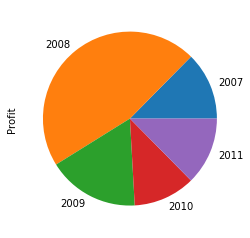

In [98]:
Movies.groupby('Year')['Profit'].sum().plot(kind = 'pie')

In [99]:
Drop_List = ['Romence', 'romance' ,'Fantasy', 'comedy',  'Comdy',  'Action']        

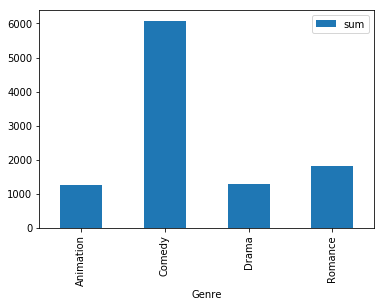

In [102]:
Quads = Movies.groupby(['Genre'])['Global_Gains'].agg(['sum']).drop(['Romence', 'romance' ,'Fantasy', 'comedy',  'Comdy',  'Action'])
Quads.plot(kind = 'bar')